In [1]:
import nltk, re, pprint
from nltk import word_tokenize

## 1.1 Accessing Text from the Web and from Disk

**Electronic Books:**

In [2]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf-8-sig')
type(raw), len(raw), raw[:75]

(str,
 1176811,
 'The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n')

##### Tokenization:

In [3]:
tokens = word_tokenize(raw)
type(tokens), len(tokens)
print(tokens[:10])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by']


In [4]:
text = nltk.Text(tokens)
print(text[1024:1062])
type(text), text.collocations()

['insight', 'impresses', 'us', 'as', 'wisdom', '...', 'that', 'wisdom', 'of', 'the', 'heart', 'which', 'we', 'seek', 'that', 'we', 'may', 'learn', 'from', 'it', 'how', 'to', 'live', '.', 'All', 'his', 'other', 'gifts', 'came', 'to', 'him', 'from', 'nature', ',', 'this', 'he', 'won', 'for']
Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


(nltk.text.Text, None)

##### Remove artifacts from text:

In [5]:
raw.find('PART I') # Case sensitive

5574

In [6]:
raw.rfind("END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT") # reverse find

1158052

In [7]:
raw = raw[5574:1158052]
raw.find("PART I")

0

### Dealing with HTML:

In [8]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf-8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [9]:
#print(html)

In [10]:
from bs4 import BeautifulSoup

raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
print(tokens[:20])

tokens = tokens[112:392]
print(tokens[:20])

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'CATEGORIES', 'TV', 'RADIO', 'COMMUNICATE', 'WHERE', 'I', 'LIVE', 'INDEX']
['Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'Scientists', 'believe', 'the', 'last', 'blondes', 'will', 'be', 'in', 'Finland', 'The', 'last', 'natural', 'blondes']


In [11]:
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


### Processing RSS feeds:

In [12]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

In [13]:
llog['feed']['title'], len(llog.entries) # blog title and number of blog entries

('Language Log', 13)

In [14]:
post = llog.entries[1]
post.title

'Carrie Lam&#039;s mother'

In [15]:
content = post.content[0].value
content[:700]

'<p>Via Jeff DeMarco on Facebook comes this imagined conversation between the leaders of China and Hong Kong, Xi Jinping and Carrie Lam.</p>\n<p align="center"><a href="http://languagelog.ldc.upenn.edu/~bgzimmer/carrielam.jpg"><img alt="" src="http://languagelog.ldc.upenn.edu/~bgzimmer/carrielam.jpg" title="Click to embiggen" width="475" /></a><span id="more-53425"></span></p>\n<p>A translation of the Cantonese from Abraham Chan:</p>\n<p style="padding-left: 40px;">娥妹，近排辛苦你喇！<br />\nngo4 mui2, gan6 paai2 san1 fu2 nei5 laak3.<br />\nCarrie, it must have been hard for you these days.</p>\n<p style="padding-left: 40px;">平哥，我唔辛苦，其他人慘啫，我冇事。<br />\nping4 go1, ngo5 m4 san1 fu2, kei4 taa1 jan4 caam2 ze1, ng'

In [16]:
raw = BeautifulSoup(content, 'html.parser').get_text()
tokens = word_tokenize(raw)

print(tokens[:50])

['Via', 'Jeff', 'DeMarco', 'on', 'Facebook', 'comes', 'this', 'imagined', 'conversation', 'between', 'the', 'leaders', 'of', 'China', 'and', 'Hong', 'Kong', ',', 'Xi', 'Jinping', 'and', 'Carrie', 'Lam', '.', 'A', 'translation', 'of', 'the', 'Cantonese', 'from', 'Abraham', 'Chan', ':', '娥妹，近排辛苦你喇！', 'ngo4', 'mui2', ',', 'gan6', 'paai2', 'san1', 'fu2', 'nei5', 'laak3', '.', 'Carrie', ',', 'it', 'must', 'have', 'been']


In [17]:
from nltk.corpus import stopwords

filtered_words = [x for x in tokens if x.lower() not in stopwords.words('english')]
print(filtered_words[:50])

['Via', 'Jeff', 'DeMarco', 'Facebook', 'comes', 'imagined', 'conversation', 'leaders', 'China', 'Hong', 'Kong', ',', 'Xi', 'Jinping', 'Carrie', 'Lam', '.', 'translation', 'Cantonese', 'Abraham', 'Chan', ':', '娥妹，近排辛苦你喇！', 'ngo4', 'mui2', ',', 'gan6', 'paai2', 'san1', 'fu2', 'nei5', 'laak3', '.', 'Carrie', ',', 'must', 'hard', 'days', '.', '平哥，我唔辛苦，其他人慘啫，我冇事。', 'ping4', 'go1', ',', 'ngo5', 'm4', 'san1', 'fu2', ',', 'kei4', 'taa1']


### Reading local files:

In [18]:
f = open(r'D:/ML/Datasets/test_document.txt')
raw = f.read()
print(raw)

this is da text!
the rainbow fox flew over a sleepy robot


Examine files in the current directory: 

In [19]:
import os

print(os.listdir('.'))

['.git', '.gitignore', '.ipynb_checkpoints', 'accessing_text_corpora.ipynb', 'conditional_freq_dist.py', 'function_testing.py', 'getting_started.ipynb', 'lexical_resources.ipynb', 'monty.py', 'nltk_functions.py', 'processing_raw_text.ipynb', 'README.md']


NLTK's corpus files can be accessed in the same manner, we just need to get the filename first:

In [20]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw = open(path).read()
#raw = open(path) # use this to insert new lines instead of '\n' characters
#for x in raw:
#    print(x.strip())
raw[:100]

'[Moby Dick by Herman Melville 1851]\n\n\nETYMOLOGY.\n\n(Supplied by a Late Consumptive Usher to a Grammar'

### Capturing user input:

In [21]:
s = input("Enter some text: ")

Enter some text: solomente


In [22]:
print("You typed", len(word_tokenize(s)), "words.")

You typed 1 words.


## 1.2 Low level text processing:

**Apostrophe within text string:**

In [23]:
circus = 'Monty Python\'s Flying Circus'
circus

"Monty Python's Flying Circus"

**Text string over multiple lines:**

In [24]:
couplet = 'Shall I compare thee to a Summer\'s day?'\
          'Thou are more lovely and more temperate:'
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [25]:
couplet = ('Shall I compare thee to a Summer\'s day?'
          'Thou are more lovely and more temperate:')
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [26]:
couplet = """Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:"""
print(couplet)

Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:


**Operations on strings:**

In [27]:
'very' * 3

'veryveryvery'

In [28]:
a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'very' * i for i in a]
for line in b:
    print(line)

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


In [29]:
monty = 'Monty Python'
monty

'Monty Python'

In [30]:
print(monty)

Monty Python


In [31]:
import nltk
from nltk.corpus import gutenberg

raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

***Tuple unpacking:***

In [32]:
[x for x, y in fdist.most_common(5)]

['e', 't', 'a', 'o', 'n']

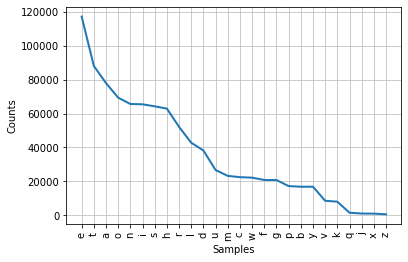

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
fdist.plot()

***Find the position of a substring within a string:***

In [34]:
monty.find('Python'), monty.rfind('Python')

(6, 6)

In [35]:
monty[6:]

'Python'

In [36]:
sent = 'my sentence is the most sentenced.'
sent.split()

['my', 'sentence', 'is', 'the', 'most', 'sentenced.']

**Operations on lists:**

In [37]:
beatles = ['John', 'Paul', 'George', 'Ringo']
beatles[0] = 'John Lennon'
del beatles[-1]
beatles

['John Lennon', 'Paul', 'George']

## 1.3 Text processing with Unicode:

In [38]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

**Display non-ASCII characters as codepoints:**

In [43]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


In [44]:
ord('ń')

324

In [45]:
nacute = '\u0144'
nacute

'ń'

In [47]:
nacute.encode('utf-8-sig')

b'\xef\xbb\xbf\xc5\x84'

**Inspect Unicode character properties:**

In [81]:
import unicodedata
lines = open(path, encoding='latin2').readlines()
line = lines[2]
print(line)
print(line.encode('unicode_escape'))

Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


**Return UTF-8 byte sequence, hexidecimal value and description:**

In [82]:
for x in line:
    if ord(x) > 127:
        print('{} U+{:04x} {}'.format(x.encode('utf8'), ord(x), unicodedata.name(x)))

b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


In [83]:
line.find('zosta\u0142y')

54

In [84]:
line = line.lower()
line

'niemców pod koniec ii wojny światowej na dolny śląsk, zostały\n'

In [85]:
line.encode('unicode_escape')

b'niemc\\xf3w pod koniec ii wojny \\u015bwiatowej na dolny \\u015bl\\u0105sk, zosta\\u0142y\\n'

In [88]:
import re

m = re.search('\u015b\w*', line)
m.group()

'światowej'

In [87]:
print(word_tokenize(line))

['niemców', 'pod', 'koniec', 'ii', 'wojny', 'światowej', 'na', 'dolny', 'śląsk', ',', 'zostały']


## 1.4 Regular expressions for detecting word patterns:

**Using basic meta-characters:**

In [101]:
wordlist = [x for x in nltk.corpus.words.words('en') if x.islower()] # islower() is to remove any proper names

[x for x in wordlist if re.search('ed$', x)]

[x for x in wordlist if re.search('^..j..t..$', x)][:5]

sum(1 for x in wordlist if re.search('^e-?mail$', x))

0

**Ranges and closures:**

In [103]:
[x for x in wordlist if re.search('^[ghi][mno][jlk][def]$', x)]

['gold', 'golf', 'hold', 'hole']

In [107]:
[x for x in wordlist if re.search('^[g-o]+$', x)][:5]

['g', 'ghoom', 'gig', 'giggling', 'gigolo']

In [108]:
chat_words = sorted(set(x for x in nltk.corpus.nps_chat.words()))

In [109]:
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [112]:
[w for w in chat_words if re.search('^[ah]+$', w)][:5]

['a', 'aaaaaaaaaaaaaaaaa', 'aaahhhh', 'ah', 'ahah']

In [114]:
[w for w in chat_words if re.search('^m*i*n*e*$', w)][:5]

['', 'e', 'i', 'in', 'm']

In [135]:
[w for w in wordlist if re.search('^[^aeiouAEIOU]+$', w)][:10]

['b', 'by', 'byth', 'c', 'cly', 'cry', 'crypt', 'cwm', 'cyp', 'cyst']

In [142]:
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('p(ed|ing)$', w)][:5]

['Developed', 'Xiaoping', 'anti-dumping', 'capped', 'chopped']

In [143]:
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('ed|ing$', w)][:5]

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced']

In [174]:
[w for w in wordlist if re.search('^j[oke]+[br]{1,}$', w)]

['jeer', 'job', 'joker']

**Extract word pieces:**

In [184]:
word = 'supercalifragilisticexpialidocious'
print(re.findall(r'[ktg]', word))

['g', 't']


In [185]:
len(re.findall(r'[ktg]', word))

2

In [186]:
wsj = sorted(set(nltk.corpus.treebank.words()))

In [191]:
fd = nltk.FreqDist(x for word in wsj
                  for x in re.findall(r'[aeiou]{2,}', word))
print(fd.most_common(12))

[('io', 549), ('ea', 476), ('ie', 331), ('ou', 329), ('ai', 261), ('ia', 253), ('ee', 217), ('oo', 174), ('ua', 109), ('au', 106), ('ue', 105), ('ui', 95)]


In [192]:
[int(n) for n in re.findall(r'[0-9]{2,}', '2009-12-31')]

[2009, 12, 31]

### Doing more with word pieces:

In [201]:
english_udhr = nltk.corpus.udhr.words('English-Latin1')
regexp = r'[^AEIOUaeiou]|[AEIOUaeiou]+$|^[AEIOUaeiou]+'
pieces = re.findall(regexp, 'Universalealeee')
''.join(pieces)

'Unvrslleee'

***Remove letters from words:***

In [202]:
def compress(word):
    regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


***Combine regular expressions with conditional frequency distributions:***

In [234]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [x for y in rotokas_words for x in re.findall(r'[ptksvr][aeiou]', y)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate() # consonants are conditions and vowels are events(?)

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [233]:
list_rokotas = []

for y in rotokas_words[:10]:
    for x in re.findall(r'[ptksvr][aeiou]', y):
        list_rokotas.append(x)

list_rokotas[:10]

['ka', 'ka', 'ka', 'ka', 'ka', 'ro', 'ka', 'ka', 'vi', 'ko']

In [246]:
cv_word_pairs = [(x, y) for y in rotokas_words for x in re.findall(r'[ptksvr][aeiou]', y)]
cv_index = nltk.Index(cv_word_pairs)
cv_index['so'][:5]

['kaekaesoto', 'kekesopa']

**Find word stems:**

In [253]:
re.findall(r'^.*(ly|ing|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [252]:
re.findall(r'^.*(?:ly|ing|ed|ious|ies|ive|es|s|ment)$', 'processing') # add '?:' to specify the scope of the disjunction
                                                                      # rather than to select the material we want to be output

['processing']

In [255]:
re.findall(r'(^.*)(ly|ing|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

In [257]:
re.findall(r'(^.*?)(ly|ing|ed|ious|ies|ive|es|s|ment)$', 'processes') # add '*?' to prevent '*' from filling up as much of
                                                                      # the input as possible

[('process', 'es')]

In [260]:
re.findall(r'(^.*?)(ly|ing|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

In [264]:
# Even though far from perfect still acceptable stems in some applications

def stem(word):
    regexp = r'(^.*?)(ly|ing|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

print([stem(t) for t in tokens][:10])

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut']


**Search tokenized text:**

In [265]:
from nltk.corpus import gutenberg, nps_chat

In [271]:
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>") # note parentheses around '<.*>' to only return the middle token

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [272]:
chat = nltk.Text(nps_chat.words())
chat.findall(r'<.*> <.*> <bro>')

you rule bro; telling you bro; u twizted bro


In [273]:
chat.findall(r'<l.*>{3,}')

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [297]:
nltk.re_show(r'p[aeiou]{,2}t', raw)

DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony.


***Discover hypernyms using regular expressions:***

In [299]:
from nltk.corpus import brown

hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r'<\w*> <and> <other> <\w*s>')

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals
